In [109]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

loan_data = pd.read_csv("loan_data.csv")

print(loan_data.head(5))

                                                Text  Income  Credit_Score  \
0  I need a loan to pay for an international vaca...   26556           581   
1  I want to make home improvements like installi...  197392           389   
2  I need a loan for home renovation, including a...   44561           523   
3  I need funds to buy new furniture and applianc...  190363           729   
4           I need a loan to start a small business.   61853           732   

   Loan_Amount  DTI_Ratio Employment_Status  Approval  
0         8314      79.26          employed  Rejected  
1       111604      22.14          employed  Rejected  
2        34118      45.44          employed  Rejected  
3       118757      10.22        unemployed  Rejected  
4        19210      44.13          employed  Approved  


In [110]:
feature_list = list(loan_data.columns)
feature_list.remove('Approval')
feature_list.remove('Text')
print(feature_list)
loan_data['Approval'] = loan_data['Approval'].map({'Approved' : 1.0, 'Rejected' : 0.0})
loan_data['Employment_Status'] = loan_data['Employment_Status'].map({'employed': 1.0, 'unemployed' : 0.0})
features = loan_data[feature_list]
labels = loan_data['Approval']

['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio', 'Employment_Status']


In [111]:
loan_data.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167,0.499708,0.163875
std,51729.677627,159.227621,34666.604785,32.322471,0.500010,0.370170
min,20001.000000,300.000000,1005.000000,2.530000,0.000000,0.000000
25%,65635.750000,437.000000,16212.000000,14.507500,0.000000,0.000000
50%,110464.000000,575.000000,35207.000000,24.860000,0.000000,0.000000
75%,155187.000000,715.000000,65622.750000,41.840000,1.000000,0.000000
max,200000.000000,850.000000,158834.000000,246.330000,1.000000,1.000000


In [116]:
train_X, test_X, train_y, test_y = train_test_split(features, labels, random_state = 1) # X, y, random_state

leafs_nodes = [5, 50, 500, 5000]

leafs_list = {}
best_mae = float('inf')
for leaf in leafs_nodes:
    model = DecisionTreeClassifier(random_state = 1, max_leaf_nodes = leaf)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)

    accuracy = accuracy_score(test_y, preds)
    leafs_list[leaf] = accuracy
    print(accuracy)

optimal_leaf_nodes_size = max(leafs_list, key=leafs_list.get)
best_accuracy = leafs_list[optimal_leaf_nodes_size]

0.956
0.9945
0.9951666666666666
0.9951666666666666


In [122]:
print(best_accuracy)

0.9951666666666666


[[4989   14]
 [  15  982]]


<Axes: >

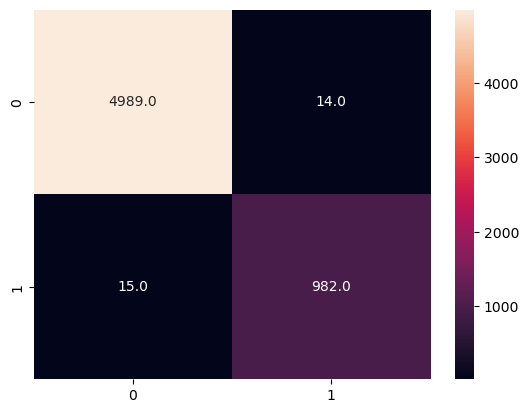

In [129]:
import seaborn as sb
conf_matrix = confusion_matrix(test_y, preds)
print(conf_matrix)
sb.heatmap(conf_matrix, annot = True, fmt = ".1f")